# 1. 데이터로드 및 전처리

In [0]:
import os
import numpy as np
import keras

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 19s 0us/step


In [0]:
#데이터셋 확인하기
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


In [0]:
#one-hot encoding : 클래스 개수가 10개니까 10개로 인코딩
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [0]:
#one-hot encoding 결과
print(y_test.shape)
print(y_test)

(10000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [0]:
#데이터셋 확인하기
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 10)
Shape of test data:
(10000, 32, 32, 3)
(10000, 10)


# 2. Modeling

In [0]:
from keras.layers import Dense, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.optimizers import SGD

In [0]:
#Model

model = Sequential()

#Conv2D(filters, kernel_size)
#filters : output 차원(합성곱 차원)
#kernel_size : 이미지의 특징을 찾아내기위한 파라미터. 합성곱(convolution)을 kernel_size에 대응시킴
#pooling : 합성곱을 거쳐서 activation map을 얻었을때, 크기를 조정하여 새로운 층을 얻는것
#          각 픽셀에서 하나의값을 뽑아내는 과정
#maxpooling : 각 픽셀에서 가장 큰 값을 뽑아내서 크기를 줄이는 방법
#             pooling_size=(2,2)는 전체 크기를 절반으로 줄인다는 의미
#Dropout : 특정노드에 학습이 지나치게 몰리는것을 막기위해 랜덤하게 노드를 꺼냄 -> 과적합 해결
#Dense : hidden layer를 만들어줌. (hidden layer의 노드수를 입력값으로 받음)
#        첫번째층에서 256개의 히든노드를 만들고, 두번째 층에서는 softmax를 통해 라벨 개수(10개)만큼 생성


#첫번째 층 - 첫번째에만 input shape를 지정
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
#두번째 층
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

#lr = learning rate
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

In [0]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=2, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/15
 - 16s - loss: 1.6616 - acc: 0.3972 - val_loss: 1.4027 - val_acc: 0.5010
Epoch 2/15
 - 11s - loss: 1.3261 - acc: 0.5209 - val_loss: 1.2727 - val_acc: 0.5472
Epoch 3/15
 - 11s - loss: 1.1452 - acc: 0.5933 - val_loss: 1.0508 - val_acc: 0.6346
Epoch 4/15
 - 10s - loss: 1.0055 - acc: 0.6431 - val_loss: 1.0078 - val_acc: 0.6488
Epoch 5/15
 - 10s - loss: 0.8838 - acc: 0.6889 - val_loss: 0.9655 - val_acc: 0.6708
Epoch 6/15
 - 10s - loss: 0.7875 - acc: 0.7209 - val_loss: 0.9646 - val_acc: 0.6668
Epoch 7/15
 - 10s - loss: 0.6940 - acc: 0.7529 - val_loss: 1.0063 - val_acc: 0.6637
Epoch 8/15
 - 10s - loss: 0.6087 - acc: 0.7867 - val_loss: 0.9743 - val_acc: 0.6752
Epoch 9/15
 - 10s - loss: 0.5415 - acc: 0.8116 - val_loss: 1.0385 - val_acc: 0.6638
Epoch 10/15
 - 10s - loss: 0.4843 - acc: 0.8291 - val_loss: 1.0802 - val_acc: 0.6706
Epoch 11/15
 - 10s - loss: 0.4413 - acc: 0.8463 - val_loss: 1

In [0]:
import matplotlib.pyplot as plt

In [0]:
#Loss를 그리는 함수
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

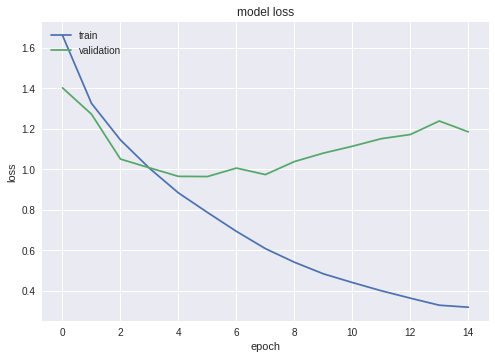

In [0]:
plotLosses(history)

In [0]:
#test set으로 생성한 모델 평가
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [0]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[1.2001104747772218, 0.6681]
